In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gensim
from gensim.corpora import Dictionary
import joblib
import preprocessing

DATA_PATH = './data/'

In [2]:
def load_songs(filename, nrows=None):
    return pd.read_csv(filename, sep='\t', nrows=nrows)


def load_artists(filename, nrows=None):
    return pd.read_csv(filename, sep=',', nrows=nrows)


def load_albums(filename, nrows=None):
    return pd.read_csv(filename, sep='\t', nrows=nrows)

def random_key_from_dict(dictionary, seed=123):
    keys_list = list(dictionary.keys())
    np.random.seed(seed)
    random_index = np.random.choice(len(keys_list))
    return keys_list[random_index]

In [3]:
df = load_songs(filename=DATA_PATH + 'wasabi_songs.csv', nrows=1000)
pd.value_counts(df['explicit_content_lyrics_predicted'])

unk    621
0.0    312
1.0     67
Name: explicit_content_lyrics_predicted, dtype: int64

Song ID: ObjectId(5714deec25ac0d8aee57cbfc)


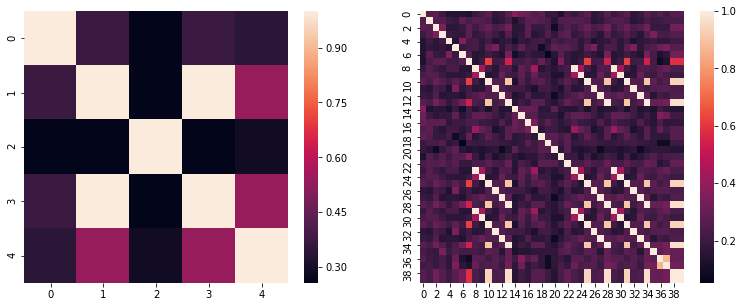

In [4]:
### Show segment-wise and line-wise SSMs ###
ssm = pd.read_pickle(DATA_PATH + 'wasabi_ssm_line_segment/ssm_wasabi_17.pickle')
song_id = random_key_from_dict(ssm, seed=4)
song_ssm = ssm[song_id]
print('Song ID:', song_id)
fig, ax = plt.subplots(1, 2, figsize=(13,5))
sns.heatmap(data=song_ssm['segment'], ax=ax[0])
sns.heatmap(data=song_ssm['line'], ax=ax[1])
plt.show()

In [5]:
### Show a summary ###
summaries = pd.read_pickle(DATA_PATH + 'id_to_summary_lines.pickle')
song_id = random_key_from_dict(summaries, seed=12)
print('\n'.join(summaries[song_id]))

how do i live without you
how do i breathe without you
if you ever go
please tell me baby how can i go on


In [6]:
### Lookup predicted topics for WASABI songs ###
topics = pd.read_pickle(DATA_PATH + 'wasabi_topic_predictions/song_id_to_topics.pickle')
topic_model = joblib.load(DATA_PATH + 'wasabi_topic_predictions/lda_model_16.jl')
print('Topics:', '\n')
print(topic_model.show_topics())

song_id = random_key_from_dict(topics)
print('Song ID:', song_id, '\n')
topics[song_id]

Topics: 

[(13, '0.022*"get" + 0.022*"nigga" + 0.022*"fuck" + 0.021*"shit" + 0.017*"bitch" + 0.014*"ain" + 0.010*"ass" + 0.009*"yo" + 0.008*"niggas" + 0.007*"hit"'), (28, '0.361*"day" + 0.089*"new" + 0.071*"body" + 0.050*"follow" + 0.049*"happy" + 0.042*"make" + 0.021*"count" + 0.019*"hour" + 0.019*"someday" + 0.018*"everyday"'), (31, '0.401*"will" + 0.090*"die" + 0.073*"cry" + 0.060*"burn" + 0.053*"tear" + 0.052*"fire" + 0.045*"pain" + 0.025*"fear" + 0.013*"flame" + 0.012*"bleed"'), (34, '0.091*"true" + 0.085*"blue" + 0.078*"year" + 0.048*"white" + 0.040*"send" + 0.040*"everyone" + 0.034*"brother" + 0.028*"ring" + 0.024*"strange" + 0.019*"christmas"'), (38, '0.501*"not" + 0.099*"word" + 0.038*"side" + 0.027*"afraid" + 0.025*"know" + 0.021*"belong" + 0.013*"anyone" + 0.011*"when" + 0.008*"ill" + 0.008*"try"'), (29, '0.248*"life" + 0.128*"lose" + 0.122*"lie" + 0.107*"everything" + 0.040*"truth" + 0.036*"anything" + 0.029*"happen" + 0.027*"carry" + 0.018*"choose" + 0.009*"tell"'), (42, '

[(0, 0.03801979),
 (3, 0.026399245),
 (4, 0.040274564),
 (9, 0.010879494),
 (11, 0.017802268),
 (12, 0.024566801),
 (13, 0.012025544),
 (14, 0.01107724),
 (15, 0.016291052),
 (16, 0.016872954),
 (18, 0.029906582),
 (19, 0.049983423),
 (22, 0.036124565),
 (23, 0.016387876),
 (24, 0.026229111),
 (25, 0.038607854),
 (26, 0.017706536),
 (29, 0.051364005),
 (30, 0.022572078),
 (31, 0.010999284),
 (34, 0.018136553),
 (37, 0.02376827),
 (44, 0.037566032),
 (48, 0.012045188),
 (49, 0.066664904),
 (51, 0.01023145),
 (53, 0.01655226),
 (54, 0.011337862),
 (58, 0.1013274)]

In [7]:
### Compute topic distribution for unseen texts ###
topic_model = joblib.load(DATA_PATH + 'wasabi_topic_predictions/lda_model_16.jl')
dictionary = pd.read_pickle(DATA_PATH + 'song_id_to_topics/dictionary.pickle')
corpus = ["So one night I said to Kathy We gotta get away somehow Go somewhere south and somewhere warm But for God's sake let's go now. And Kathy she sort of looks at me And asks where I wanna go So I look back and I hear me say I don't care but we gotta go chorus and key change And all the other people Who slepwalk thru their days Just sort of faded out of sight When we two drove away And ev'ry day we travelled We were lookin' to get wise And we learned what was the truth And we learned what were the lies And in LA we bought a bus Sort of old and not too smart So for six hundred and fifty bucks We got out and made a start We hit the road down to the South And drove into Mexico That old bus was some old wreck But it just kept us on the road. chorus etc We drove up to Alabam And a farmer gave us some jobs We worked them crops all night and day And at night we slept like dogs We got paid and Kathy said to me It's time to make a move again And when I looked into her eyes I saw more than a friend. chorus etc And now we've stopped our travels And we sold the bus in Texas And we made our home in Austin And for sure it ain't no palace And Kathy and me we settled down And now our first kid's on the way Kathy and me and that old bus We did real good to get away."]
corpus = preprocessing.complex_preprocess(corpus)
dictionary = Dictionary(corpus)
# dictionary.filter_extremes()
corpus_bow = [dictionary.doc2bow(text) for text in corpus]
for text in corpus_bow:
    print('\n', topic_model[text])

Extracted 142 unigrams: 0.000598907470703125 	 ['so', 'one', 'night', 'i', 'said', 'to', 'kathy', 'we', 'gotta', 'get']
Extracted 142 uni/bigrams: 0.006611824035644531 	 []
Extracted 79 lemmas: 0.7292101383209229 	 ['so', 'night', 'say', 'get', 'away', 'somehow', 'go', 'somewhere', 'south', 'somewhere', 'warm', 'sake', 'let', 'go', 'now', 'sort', 'of', 'look', 'ask', 'where', 'go', 'so', 'look', 'back', 'hear', 'say', 'don', 'care', 'get', 'go', 'chorus', 'key', 'change', 'other', 'people', 'slepwalk', 'day', 'just', 'sort', 'of', 'fade', 'sight', 'when', 'drive', 'away', 'ev', 'day', 'travel', 'wise', 'learn', 'truth', 'learn', 'lie', 'buy', 'bus', 'sort', 'of', 'old', 'too', 'smart', 'buck', 'get', 'make', 'start', 'hit', 'road', 'south', 'drive', 'old', 'bus', 'old', 'wreck', 'just', 'keep', 'road', 'chorus', 'drive', 'farmer', 'give', 'job', 'work', 'crop', 'night', 'day', 'night', 'sleep', 'dog', 'get', 'pay', 'say', 's', 'time', 'make', 'move', 'again', 'when', 'look', 'eye', 'se

In [8]:
# TODO: show explicitness